In [1]:
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import ipywidgets as widgets

In [2]:
df = pd.read_csv('ikea.csv')
df.info()
#df['uniq_id'].unique()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 218 entries, 0 to 217
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   name            218 non-null    object 
 1   link            218 non-null    object 
 2   author          218 non-null    object 
 3   title           218 non-null    object 
 4   review_body     218 non-null    object 
 5   rating          218 non-null    int64  
 6   average_rating  218 non-null    float64
 7   source          218 non-null    object 
 8   source_url      218 non-null    object 
 9   uniq_id         218 non-null    object 
 10  scraped_at      218 non-null    object 
dtypes: float64(1), int64(1), object(9)
memory usage: 18.9+ KB


In [3]:
df['dup'] = df.duplicated(subset=None, keep='first')
df.head()


,name,link,author,title,review_body,rating,average_rating,source,source_url,uniq_id,scraped_at,dup
0,SEKTION / MAXIMERA Base cabinet w/3 fronts & 4...,https://www.ikea.com/us/en/p/sektion-maximera-...,mary b.,Ikea not what it use to be,This review is for the Sektion 3 fronts/4 draw...,3,4.1,IKEA,ikea.com,6f368bc0-b51c-5f4e-bbd2-d5d1cca61274,07/16/22,False
1,SEKTION / MAXIMERA Base cabinet w/3 fronts & 4...,https://www.ikea.com/us/en/p/sektion-maximera-...,Kathleen,looks great,looks great,5,4.1,IKEA,ikea.com,6f368bc0-b51c-5f4e-bbd2-d5d1cca61274,07/16/22,False
2,SEKTION / MAXIMERA Base cabinet w/3 fronts & 4...,https://www.ikea.com/us/en/p/sektion-maximera-...,nanette,I did not buy anything,I did not buy anything I have been trying for ...,1,4.1,IKEA,ikea.com,6f368bc0-b51c-5f4e-bbd2-d5d1cca61274,07/16/22,False
3,SEKTION / MAXIMERA Base cabinet w/3 fronts & 4...,https://www.ikea.com/us/en/p/sektion-maximera-...,PAUL,Extensive renavation,Extensive renavation,5,4.1,IKEA,ikea.com,6f368bc0-b51c-5f4e-bbd2-d5d1cca61274,07/16/22,False
4,SEKTION / MAXIMERA Base cabinet w/3 fronts & 4...,https://www.ikea.com/us/en/p/sektion-maximera-...,Holly,"Good, could be better",These cabinets/drawers system are great... how...,3,4.1,IKEA,ikea.com,6f368bc0-b51c-5f4e-bbd2-d5d1cca61274,07/16/22,False


In [4]:
duplicates = df[df['dup'] == True]
duplicates
#del df['dup']

,name,link,author,title,review_body,rating,average_rating,source,source_url,uniq_id,scraped_at,dup


In [5]:
df = df[['uniq_id','rating','review_body']]
df

,uniq_id,rating,review_body
0,6f368bc0-b51c-5f4e-bbd2-d5d1cca61274,3,This review is for the Sektion 3 fronts/4 draw...
1,6f368bc0-b51c-5f4e-bbd2-d5d1cca61274,5,looks great
2,6f368bc0-b51c-5f4e-bbd2-d5d1cca61274,1,I did not buy anything I have been trying for ...
3,6f368bc0-b51c-5f4e-bbd2-d5d1cca61274,5,Extensive renavation
4,6f368bc0-b51c-5f4e-bbd2-d5d1cca61274,3,These cabinets/drawers system are great... how...
...,...,...,...
213,92d69e22-9947-58dc-969f-e1e8af689bdf,5,Love the size and ease of use
214,92d69e22-9947-58dc-969f-e1e8af689bdf,5,Super easy install and easy for our daughter t...
215,92d69e22-9947-58dc-969f-e1e8af689bdf,5,Goes nicely in my kitchen
216,92d69e22-9947-58dc-969f-e1e8af689bdf,1,You have to make your own holes to use these d...


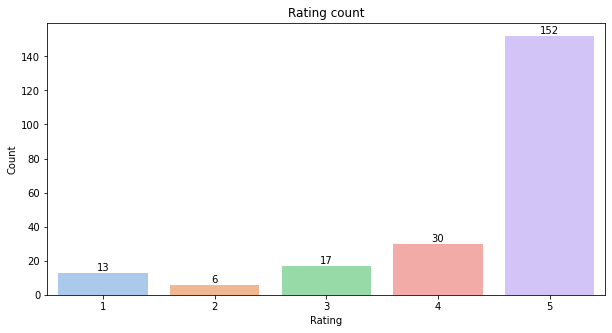

In [6]:
data = df.groupby('rating')['uniq_id'].count().reset_index()
data.sort_values('uniq_id',ascending = False, inplace = True)

plt.figure(figsize = (10,5))
plt.title('Rating count')
sns.set_palette("pastel")
s = sns.barplot(y = 'uniq_id', x='rating', data=data)
s.set_xlabel("Rating")
s.set_ylabel("Count")
s.bar_label(s.containers[0])
plt.show(s)

In [7]:
import re
from nltk.stem import WordNetLemmatizer, PorterStemmer, SnowballStemmer
stop_words = STOPWORDS

def preprocess(raw_text):
    
    # regular expression keeping only letters 
    letters_only_text = re.sub("[^a-zA-Z]", " ", raw_text)
    print(letters_only_text)

    # convert to lower case and split into words -> convert string into list ( 'hello world' -> ['hello', 'world'])
    words = letters_only_text.lower().split()

    cleaned_words = []
    lemmatizer = PorterStemmer() 
    
    # remove stopwords
    for word in words:
        if word not in stop_words:
            cleaned_words.append(word)
            
    # stemm or lemmatise words
    stemmed_words = []
    for word in cleaned_words:
        word = lemmatizer.stem(word)   #dont forget to change stem to lemmatize if you are using a lemmatizer
        stemmed_words.append(word)
    
    # converting list back to string
    return " ".join(stemmed_words)

In [8]:
df['processsed_review'] = df['review_body'].apply(preprocess) 


This review is for the Sektion   fronts   drawers   Like other reviews I agree the directions are not correct for where to place the drawer hardware on the frame  If it helps this is what I did  Starting from the bottom Drawer    row   on frame  hardware use bottom middle hole  of the   grid  I believe this is actually correct in the instructions Drawer    row    on frame top middle hole  of the   grid   Instructions say row    Drawer    row    on frame top middle hole  of the   grid   Instructions say row     Drawer    row    on frame top middle hole  of the   grid   Instructions say row      The inside drawer is flexible you could raise or lower the row you put it on  As I have above gives      inches clearance for each drawer    Hopes this helps   Regarding the quality  AKURUM system Ikea used to have the downgrade in quality is obvious  fronts are cheaper the metal support strip looks terrible if eye level with drawer and the toekick just cheap   terrible
looks great
I did not buy 

In [9]:
df.head()

,uniq_id,rating,review_body,processsed_review
0,6f368bc0-b51c-5f4e-bbd2-d5d1cca61274,3,This review is for the Sektion 3 fronts/4 draw...,review sektion front drawer review agre direct...
1,6f368bc0-b51c-5f4e-bbd2-d5d1cca61274,5,looks great,look great
2,6f368bc0-b51c-5f4e-bbd2-d5d1cca61274,1,I did not buy anything I have been trying for ...,buy anyth tri month remaind cabinet statement ...
3,6f368bc0-b51c-5f4e-bbd2-d5d1cca61274,5,Extensive renavation,extens renav
4,6f368bc0-b51c-5f4e-bbd2-d5d1cca61274,3,These cabinets/drawers system are great... how...,cabinet drawer system great darker cabinet rea...


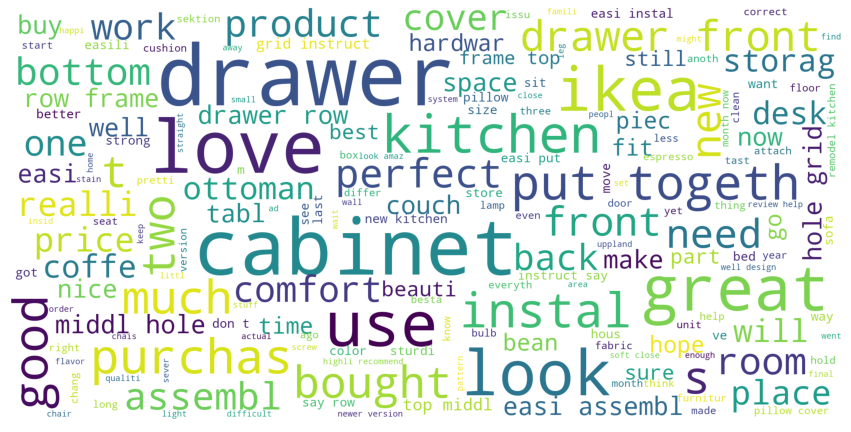

In [10]:
all_words = '' 
for arg in df.processsed_review: 

    tokens = arg.split() 
    all_words += " ".join(tokens)+" "
        
wordcloud = WordCloud(
            background_color='white',
            stopwords = STOPWORDS,
            max_words=200,
            max_font_size=40, 
            scale=5,
            random_state=1
        ).generate(all_words)

fig = plt.figure(1, figsize=(15,15))
plt.axis('off')
plt.imshow(wordcloud)
plt.show()

In [11]:
def show_wordcloud(df, title = None):
    all_words = '' 
    for arg in df: 

        tokens = arg.split() 
        all_words += " ".join(tokens)+" "
    wordcloud = WordCloud(
            background_color='white',
            stopwords = STOPWORDS,
            max_words=200,
            max_font_size=40, 
            scale=5,
            random_state=1
        ).generate(all_words)

    fig = plt.figure(1, figsize=(15,15))
    plt.axis('off')
    plt.imshow(wordcloud)
    plt.show()

In [12]:
def dropdown(rating):
    show_wordcloud(df[(df['rating']==rating)].processsed_review,rating)

In [13]:
widgets.interact(dropdown,rating = df['rating'].unique())

interactive(children=(Dropdown(description='rating', options=(3, 5, 1, 4, 2), value=3), Output()), _dom_classe…

<function __main__.dropdown(rating)>